## Practice Logistic and Softmax Regression with Scikit-learn Library

sci-kit learn 라이브러리에 있는 iris dataset을 활용하여 Logistic Regression과 Softmax Regression을 적용한 코드이다.
아래 코드는 Hands-on Machine Learning with tensorflow에 나온 코드를 이용한 것이다.
Source는 다음 페이지에서 확인 할 수 있다.
Source Page : [https://github.com/ageron/handson-ml](https://github.com/ageron/handson-ml)

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris() # iris에 대한 데이터 셋을 받는다.
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

데이터의 attributes와 class_label은 다음과 같다.
class_label의 경우는 해당 index값이 class를 가리키는 값이 된다.

In [31]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Iris에 대한 정보는 iris.DESCR을 통해 확인 할 수 있다. 여기서 활용하는 데이터는 꽃의 sepal과 petal의 길이와 폭을 본 내용이다.
내용은 자세하게 각 데이터에 대한 통계치가 나와 있고, 분류된 데이터 클래스와의 상관관계까지 나와있다.
보다 자세한 내용은 아래 내용을 참조하면 된다.

In [2]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

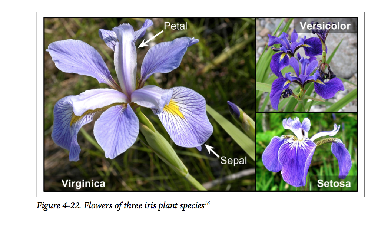

In [54]:
import matplotlib.image as mpimg
img=mpimg.imread('Iris_image.png')
plt.axis('off')
plt.imshow(img)

첫 번째로 logistic regression을 활용하고자 한다.
여기서는 petal의 폭만을 가지고 Iris-Virginica인지 아닌지에 대한 여부만을 확인하는 모델을 만들고자 한다.

In [25]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 0~3까지의 수를 1000개 랜덤생성한다. 이때 데이터는 column vector로 변환해준다.
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

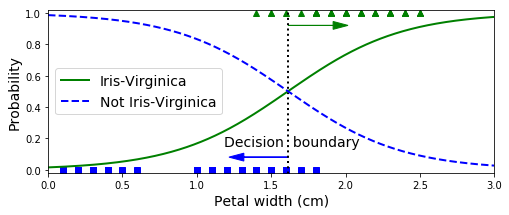

In [27]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
# 각 분류에 대한 모델 그래프를 표현한 부분이다.
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
# 해당 위치에 대한 decision boundary를 표기한 부분이다.
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
# 각 축에 대한 축을 표시하고 legend를 표기한 부분이다.
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
# 데이터 그래프에 대한 범위를 설정한 부분이다.
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [13]:
decision_boundary

array([ 1.61561562])

In [14]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

여기서는 petal의 길이와 폭을 활용하여 logistic regression을 한 것이다.

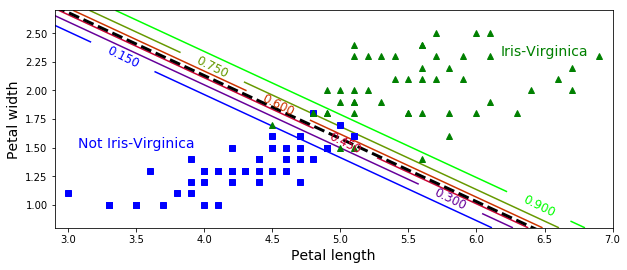

In [51]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10) # 매개변수 C는 Reguralized Strength에 대한 역수이다.
log_reg.fit(X, y)


# 입력값이 둘 이상인 경우 다음과 같은 방법으로 packing을 해주어야 한다.
# x0는 petal length, x1은 petal width이다.
# 각 데이터에 대해서 200 X 500의 행렬을 생성하도록 하였다.
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
# x0.shape => (200, 500)
# x1.shape => (200, 500)

# 각 x0,x1 데이터를 1차원으로 변환하여 concatenate를 시킨다.
X_new = np.c_[x0.ravel(), x1.ravel()]
# len(x0.ravel()) => 100000 = 200 X 500
# len(x1.ravel()) => 100000 = 200 X 500

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
# 각 분류된 데이터에 대한 내용을 plot에 표시한다.
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)

# Decision Boundary에 대한 Percentage 지점을 보여준다. contour를 활용하여 표시한다.
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg) # cmap은 color scale에 대한 지정을 하는 매개변수이다.

# Decision Boundary를 표시하는 부분
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

마지막으로 Softmax를 활용하여 3개의 클래스를 구분한 내용이다.

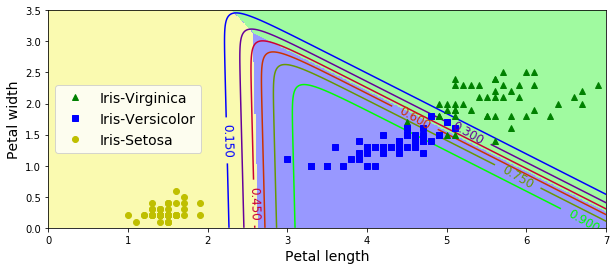

In [49]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Softmax Regression의 경우는 Multi_class에 대한 매개변수를 multinomial로 지정해주면 된다.
# 여기서는 Gradient Descent를 이용하지 않고 lbfgs를 이용하여 cost의 minimum을 구하고자 하였다.
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

# 각 class label영역에 대한 색을 칠하였다.
plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
# Decision Boundary에 대한 표시를 하였다.
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

다음은 각 데이터에 따른 클래스 구분과 그에 따른 확률들을 보인 것이다.

In [19]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict([[1, 1]]))
print(softmax_reg.predict([[4, 2]]))

[2]
[0]
[1]


In [20]:
print(softmax_reg.predict_proba([[5, 2]]))
print(softmax_reg.predict_proba([[1, 1]]))
print(softmax_reg.predict_proba([[4, 2]]))

[[  6.33134077e-07   5.75276067e-02   9.42471760e-01]]
[[  9.99528196e-01   4.71803581e-04   4.27844025e-13]]
[[ 0.00102836  0.81204487  0.18692677]]
